# Plotting the clusters into the folium map 
# clusters are showing the meeting points

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import pandas as pd
from datetime import datetime as dt
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

#laoding the original dataset
#converting the unix time into YearMonthDay
data=pd.read_csv('nari_dynamic.csv')
data['weeks'] = data['time'].map(lambda x: dt.fromtimestamp(x).strftime('%Y%m%d'))
data.drop(['id','time','speedoverground','courseoverground','trueheading'], axis=1, inplace=True)
data.head()

,navigationalstatus,rateofturn,lon,lat,weeks
0,0.0,0.0,-4.465718,48.382490,20151001
1,15.0,-127.0,-4.496571,48.382420,20151001
2,15.0,-127.0,-4.644325,48.092247,20151001
3,0.0,-127.0,-4.485108,48.381320,20151001
4,15.0,-127.0,-4.495441,48.383660,20151001


In [9]:
weeks=data['weeks']
weeks=weeks.unique()
weeks

array(['20151001', '20151002', '20151003', '20151004', '20151005',
       '20151006', '20151007', '20151008', '20151009', '20151010',
       '20151011', '20151012', '20151013', '20151014', '20151015',
       '20151016', '20151017', '20151018', '20151019', '20151020',
       '20151021', '20151022', '20151023', '20151024', '20151025',
       '20151026', '20151027', '20151028', '20151029', '20151030',
       '20151031', '20151101', '20151102', '20151103', '20151104',
       '20151105', '20151106', '20151107', '20151108', '20151109',
       '20151110', '20151111', '20151112', '20151113', '20151114',
       '20151115', '20151116', '20151117', '20151118', '20151119',
       '20151120', '20151121', '20151122', '20151123', '20151124',
       '20151125', '20151126', '20151127', '20151128', '20151129',
       '20151130', '20151201', '20151202', '20151203', '20151204',
       '20151205', '20151206', '20151207', '20151208', '20151209',
       '20151210', '20151211', '20151212', '20151213', '201512

In [10]:
#dataframe with the days reshaped to represend the weeks
weeks_df=pd.DataFrame(weeks[:182].reshape(26,7))
weeks_df

,0,1,2,3,4,5,6
0,20151001,20151002,20151003,20151004,20151005,20151006,20151007
1,20151008,20151009,20151010,20151011,20151012,20151013,20151014
2,20151015,20151016,20151017,20151018,20151019,20151020,20151021
3,20151022,20151023,20151024,20151025,20151026,20151027,20151028
4,20151029,20151030,20151031,20151101,20151102,20151103,20151104
5,20151105,20151106,20151107,20151108,20151109,20151110,20151111
6,20151112,20151113,20151114,20151115,20151116,20151117,20151118
7,20151119,20151120,20151121,20151122,20151123,20151124,20151125
8,20151126,20151127,20151128,20151129,20151130,20151201,20151202
9,20151203,20151204,20151205,20151206,20151207,20151208,20151209


In [11]:
#filter the records for the chosen week
df_week1=data.copy()

df_week1 = df_week1[df_week1['weeks'].astype(int)>=int(20160121)] 
df_week1 = df_week1[['lat', 'lon','weeks']]
df_week1 = df_week1.dropna(axis=0, subset=['lat', 'lon','weeks'])

df_week1 = df_week1[df_week1['weeks'].astype(int)<=int(20160127)] 
df_week1 = df_week1[['lat', 'lon']]
df_week1 = df_week1.dropna(axis=0, subset=['lat', 'lon'])
len(df_week1)

1017814

In [12]:
df_week1

,lat,lon
8557173,48.382233,-4.497100
8557174,48.119244,-4.788836
8557175,48.370823,-4.512602
8557176,48.112570,-4.780573
8557177,48.381565,-4.486132
8557178,48.119526,-4.442640
8557179,48.370823,-4.512602
8557180,48.369614,-4.514973
8557181,48.382442,-4.496587
8557182,48.370834,-4.512665


In [13]:
df_week1=df_week1.values
df_week1

array([[48.382233 , -4.4971   ],
       [48.119244 , -4.7888365],
       [48.370823 , -4.512602 ],
       ...,
       [48.145607 , -4.425988 ],
       [48.19017  , -4.45244  ],
       [48.37797  , -4.489023 ]])

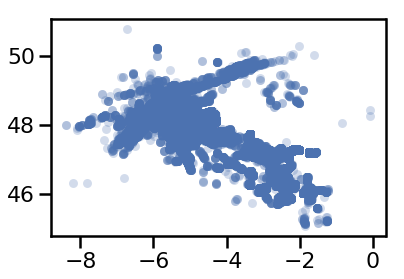

In [14]:
#plotting the poitns of the week
plt.scatter(df_week1.T[1], df_week1.T[0], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis()
frame.axes.get_yaxis()

In [15]:
#clustering algorithm by Scikit learn
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    l=labels
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[1], data.T[0], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis()#.set_visible(False)
    frame.axes.get_yaxis()#.set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    return l

In [16]:
import hdbscan

d=df_week1

C:\Users\Savvas\Anaconda3\envs\myenv\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Savvas\Anaconda3\envs\myenv\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Savvas\Anaconda3\envs\myenv\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\Users\Savvas\Anaconda3\envs\myenv\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


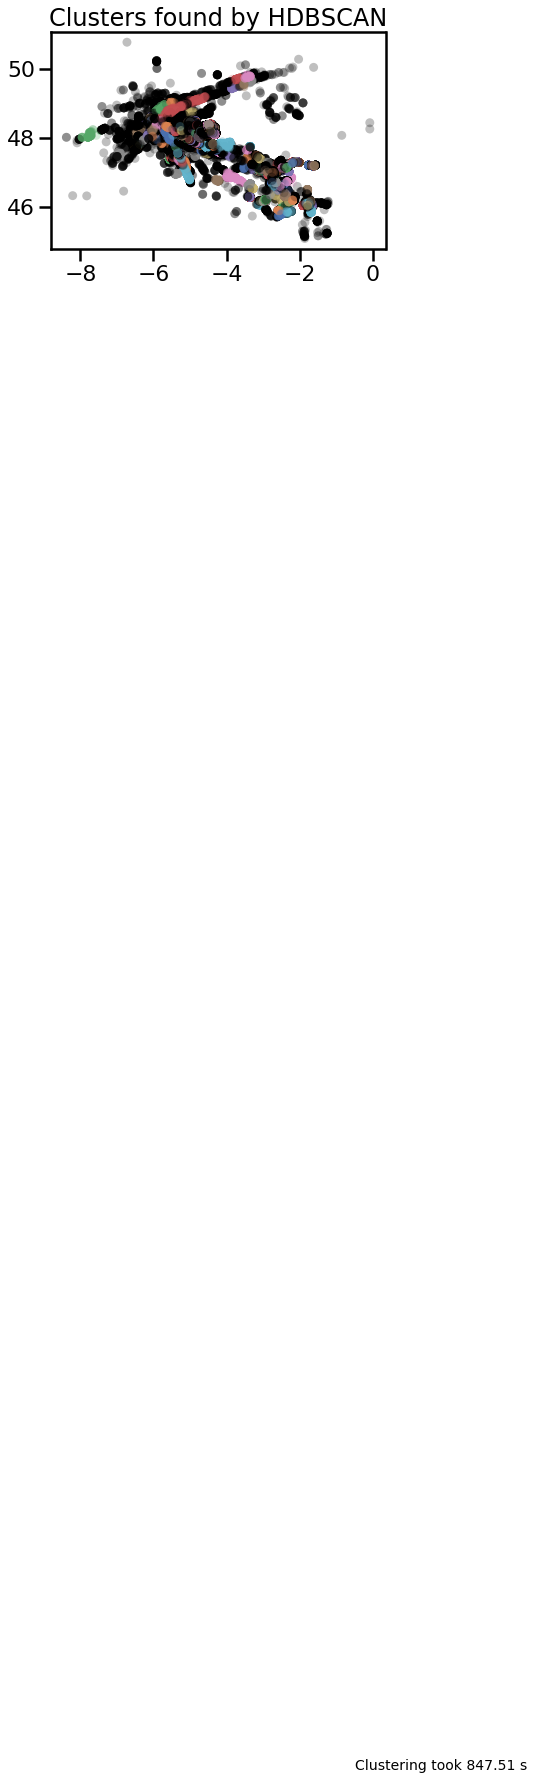

In [17]:
#HBDSCAN clustering
x=plot_clusters(d, hdbscan.HDBSCAN, (), {'min_cluster_size':50})

In [18]:
#extract the labels of the algorithm for each cluster
xs=pd.Series(x)
xs.value_counts()

-1       272692
 1790     88652
 1792     17101
 720      10274
 147       6474
 1218      5494
 1829      4497
 1799      4047
 1802      3965
 1806      3770
 607       3640
 1210      3429
 1870      3337
 392       3285
 697       3211
 1784      3169
 730       3077
 1817      3040
 1182      2982
 1869      2965
 2659      2929
 693       2829
 1137      2716
 2172      2650
 1944      2641
 540       2594
 1936      2498
 1937      2468
 2164      2463
 680       2449
          ...  
 2231        51
 1657        51
 1033        51
 2731        51
 2324        51
 1393        51
 641         51
 1760        51
 1378        51
 1758        51
 453         51
 2864        51
 1549        51
 136         51
 2509        51
 2061        51
 303         51
 749         51
 481         50
 1363        50
 702         50
 570         50
 1716        50
 1172        50
 483         50
 666         50
 302         50
 1244        50
 1726        50
 2460        50
Length: 2956, dtype: int

In [19]:
#converting the lables into a dataframe
temp=pd.DataFrame(xs.value_counts())
temp['l']=temp.index
temp.columns = ['count', 'label']
temp

,count,label
-1,272692,-1
1790,88652,1790
1792,17101,1792
720,10274,720
147,6474,147
1218,5494,1218
1829,4497,1829
1799,4047,1799
1802,3965,1802
1806,3770,1806


In [20]:
temp.describe()

,count,label
count,2956.000000,2956.000000
mean,344.321380,1476.500000
std,5296.043061,853.468023
min,50.000000,-1.000000
25%,72.000000,737.750000
50%,100.000000,1476.500000
75%,170.000000,2215.250000
max,272692.000000,2954.000000


In [21]:
temp['count'].unique()

array([272692,  88652,  17101,  10274,   6474,   5494,   4497,   4047,
         3965,   3770,   3640,   3429,   3337,   3285,   3211,   3169,
         3077,   3040,   2982,   2965,   2929,   2829,   2716,   2650,
         2641,   2594,   2498,   2468,   2463,   2449,   2362,   2339,
         2335,   2243,   2149,   2142,   2135,   2096,   2078,   2037,
         2015,   1967,   1966,   1956,   1930,   1911,   1905,   1864,
         1827,   1811,   1809,   1784,   1734,   1727,   1649,   1641,
         1631,   1565,   1556,   1539,   1535,   1492,   1483,   1469,
         1454,   1435,   1416,   1389,   1377,   1370,   1345,   1313,
         1293,   1269,   1251,   1245,   1240,   1219,   1203,   1188,
         1187,   1185,   1182,   1171,   1169,   1152,   1139,   1123,
         1110,   1086,   1085,   1059,   1057,   1002,    988,    981,
          972,    969,    957,    954,    944,    941,    937,    932,
          926,    925,    923,    918,    911,    906,    900,    894,
      

In [22]:
#filtering the data
temp=temp[temp['count'] >=4000]
temp=temp[temp['label']!=-1]
temp=temp.sort_values(by=['label'])
temp

,count,label
147,6474,147
720,10274,720
1218,5494,1218
1790,88652,1790
1792,17101,1792
1799,4047,1799
1829,4497,1829


In [23]:
import folium 
from folium import plugins
from folium.plugins import HeatMap
from collections import Counter

fm = folium.Map(location=[48.38249, -4.4657183],
                        zoom_start=8)

In [24]:
df=pd.DataFrame(df_week1)
df.columns = ['lat', 'lon']
df

,lat,lon
0,48.382233,-4.497100
1,48.119244,-4.788836
2,48.370823,-4.512602
3,48.112570,-4.780573
4,48.381565,-4.486132
5,48.119526,-4.442640
6,48.370823,-4.512602
7,48.369614,-4.514973
8,48.382442,-4.496587
9,48.370834,-4.512665


In [25]:
df['label']=x
df = df[df.label != -1]
df

,lat,lon,label
0,48.382233,-4.497100,1218
1,48.119244,-4.788836,642
2,48.370823,-4.512602,2137
4,48.381565,-4.486132,2185
6,48.370823,-4.512602,2137
7,48.369614,-4.514973,1011
9,48.370834,-4.512665,1790
11,48.098220,-4.325622,425
12,48.370834,-4.512665,1790
13,48.381332,-4.485090,2449


In [26]:
#heat map for the clusters
for i in temp['label']:
    df_=df.copy()
    
    df_ = df_[df_['label']==i] # Reducing data size so it runs faster
    df_ = df_[['lat', 'lon']]
    df_ = df_.dropna(axis=0, subset=['lat','lon'])

    #points=df_.values.tolist()
    #folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(fm)
    
    heat_data = [[row['lat'],row['lon']] for index, row in df_.iterrows()]
    HeatMap(heat_data).add_to(fm)
    
    print(i)

147
720
1218
1790
1792
1799
1829


In [27]:
fm.save("week17_clus4000.html")

In [28]:
df_labeled_poitns=df.copy()
df_labeled_poitns.head()

,lat,lon,label
0,48.382233,-4.497100,1218
1,48.119244,-4.788836,642
2,48.370823,-4.512602,2137
4,48.381565,-4.486132,2185
6,48.370823,-4.512602,2137


In [29]:
#filter the dataset keeping only the lables from df_labeled_poitns
df_labeled_poitns=df_labeled_poitns.loc[df_labeled_poitns['label'].isin(temp['label'])]

In [30]:
#plotting the points for the map
import os

fm_meatingpoints = folium.Map(location=[48.38249, -4.4657183],
                        zoom_start=8)
c=['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 
   'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 
   'lightgreen', 'gray', 'black', 'lightgray']
idx_c=0

#loop throught the lables and add the location to the map
for i,r in temp.iterrows():
    df_=df_labeled_poitns.copy()
    
    df_ = df_[df_['label']==r['label']] 
    df_ = df_[['lat', 'lon']]
    df_ = df_.dropna(axis=0, subset=['lat','lon'])
    print(i)
    
    #plot the points of the cluster
    for j,k in df_.iterrows():
        points=[df_.loc[j].values.tolist(),df_.loc[j].values.tolist()]
        folium.PolyLine(points, color=c[idx_c], weight=10, opacity=100).add_to(fm_meatingpoints)
        
    #clsuter information 
    #adding a marker at each cluster witht the info
    label=r['label']
    count=r['count']
    text=f'Label: {label} - Points: {count}'
    folium.Marker(location=df_.iloc[0], popup=text, icon=None,).add_to(fm_meatingpoints)
    idx_c+=1
    print('..............')

fm_meatingpoints.save("meeting_points_week17.html")

147
..............
720
..............
1218
..............
1790
..............
1792
..............
1799
..............
1829
..............
